<a href="https://colab.research.google.com/github/TiagoCavalca/tiagocavalca_tcc/blob/main/TCC_Tiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando primeira biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Bibliotecas para o pré-processamento
from sklearn import preprocessing

#Bibliotecas para Treinamento
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Importando biblioteca para classificação SVM
from sklearn import svm

#Importando biblioteca para classificação SGD
from sklearn.linear_model import SGDClassifier

#Import algoritmo de agrupamento
from sklearn.cluster import KMeans

#Import agrupamento para prever o número exato e ideal de clusters
from yellowbrick.cluster import KElbowVisualizer


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv', delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.tail(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,...,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,...,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,...,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

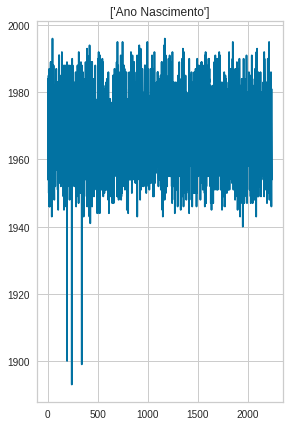

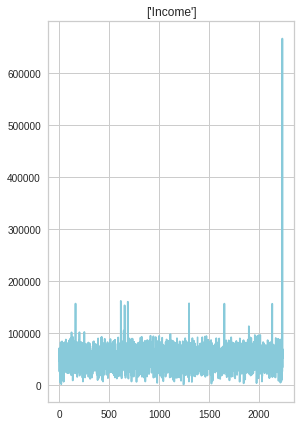

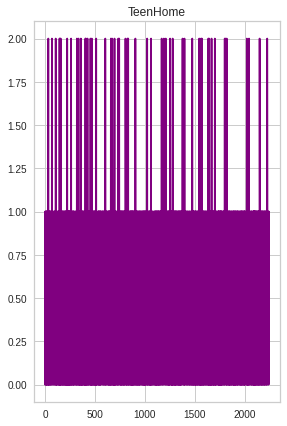

In [ ]:
fig = plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
plt.plot(df['Year_Birth'], 'b')
plt.title(['Ano Nascimento'])
plt.show()

fig = plt.figure(figsize=(15,7))
plt.subplot(1,3,2)
plt.plot(df['Income'], 'c')
plt.title(['Income'])
plt.show()

fig = plt.figure(figsize=(15,7))
plt.subplot(1,3,3)
plt.plot(df['Teenhome'], 'purple')
plt.title('TeenHome')
plt.show()

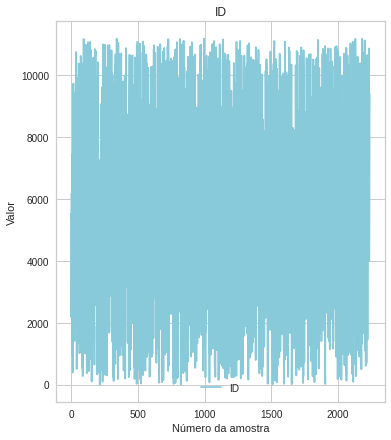

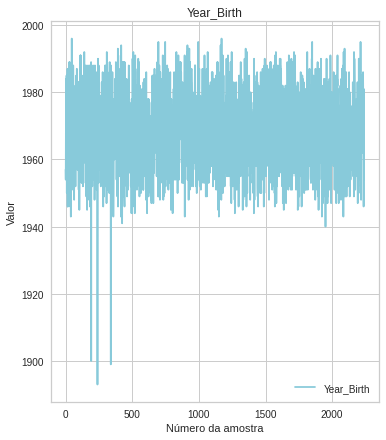

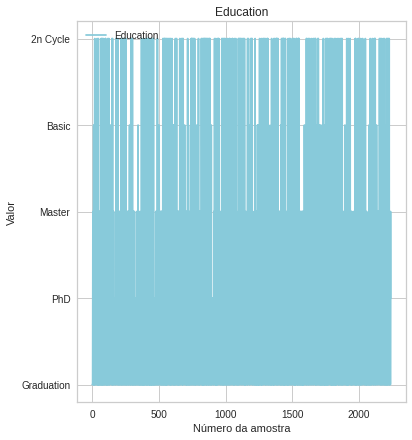

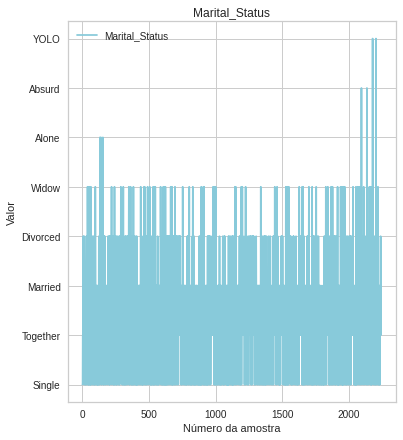

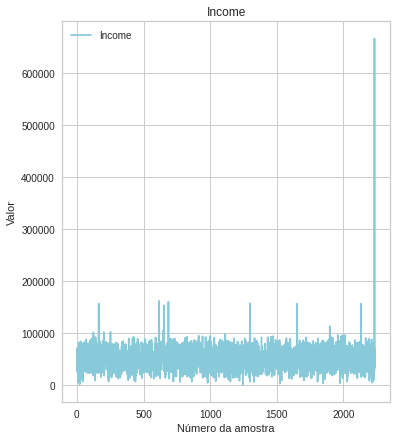

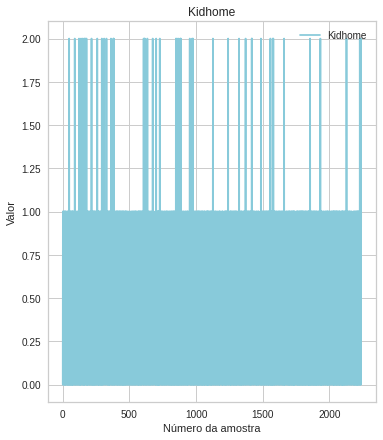

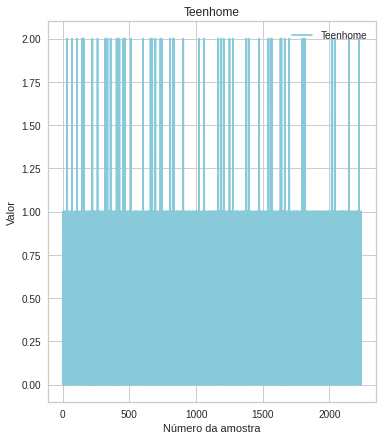

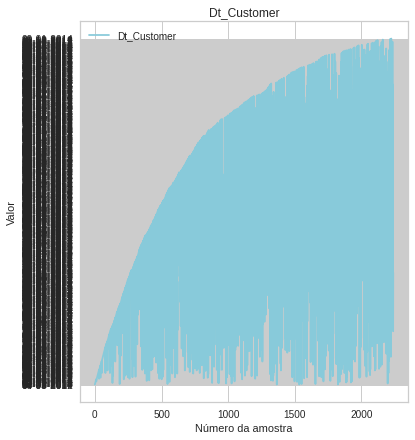

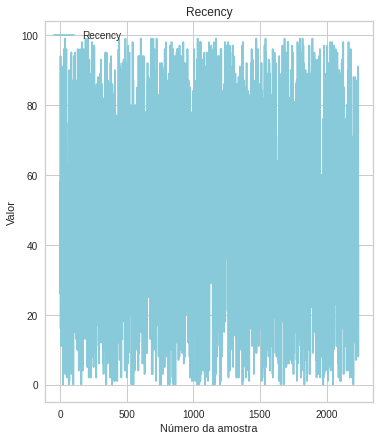

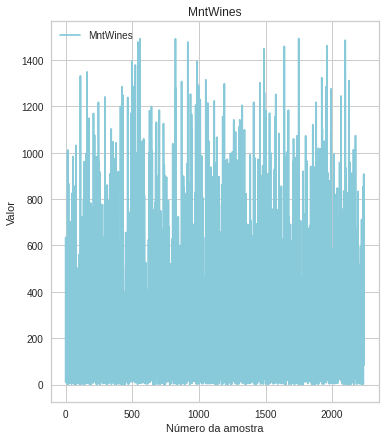

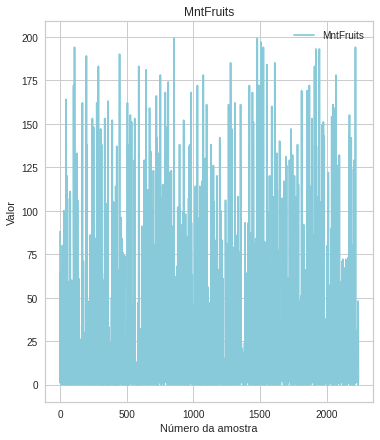

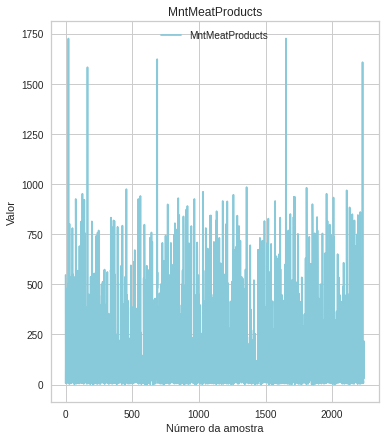

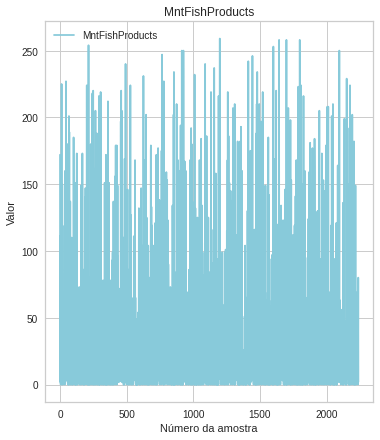

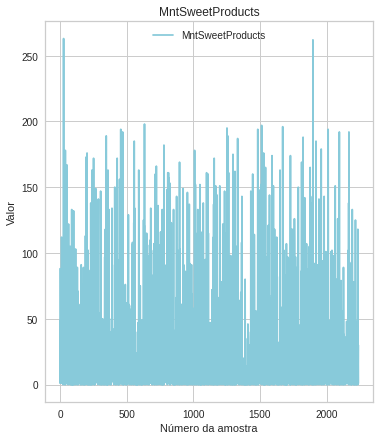

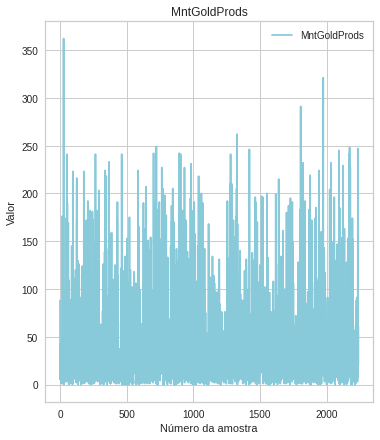

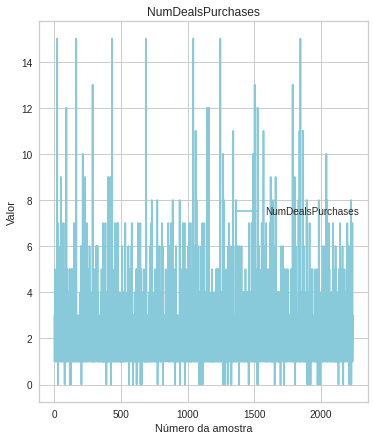

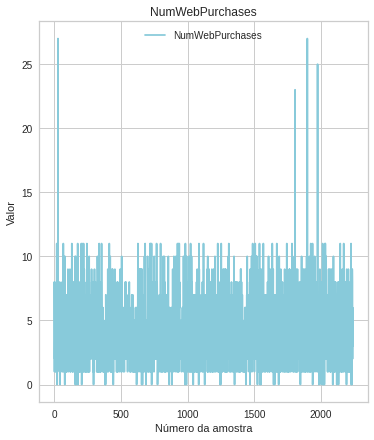

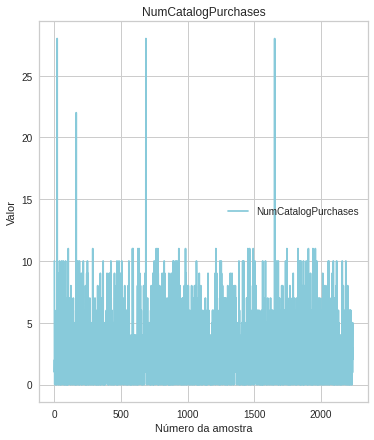

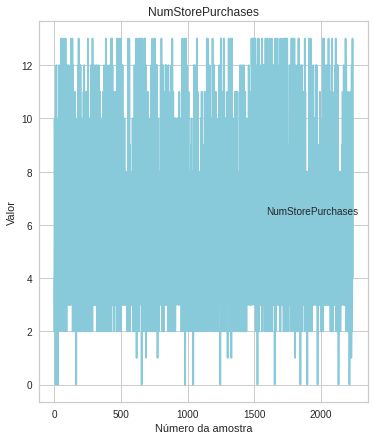

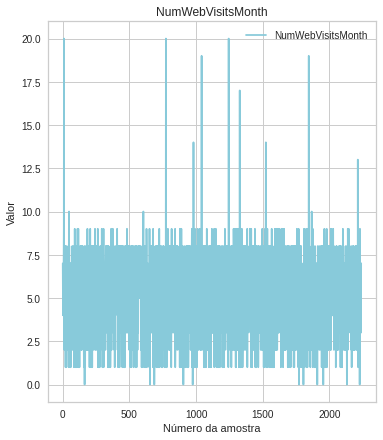

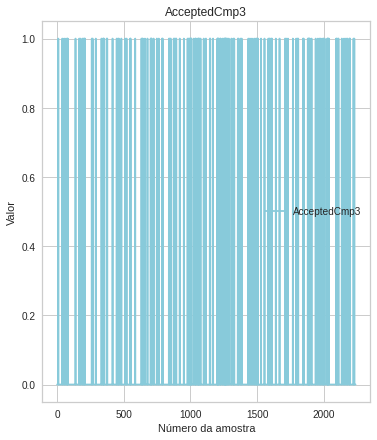

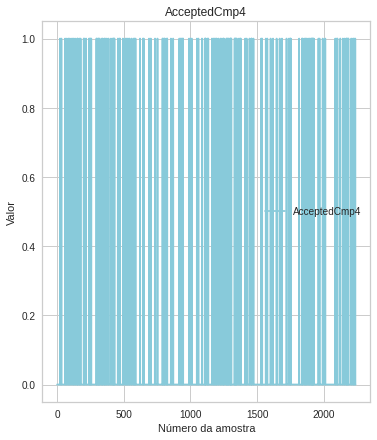

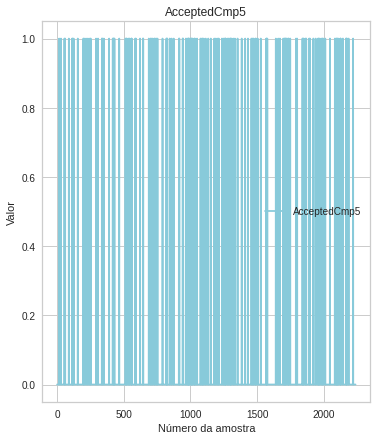

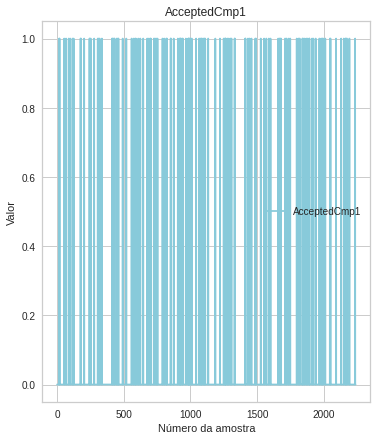

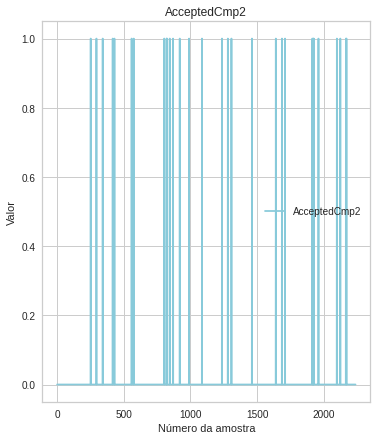

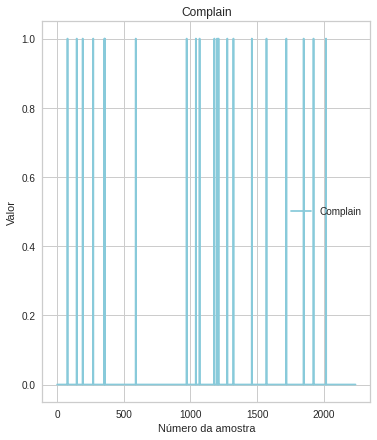

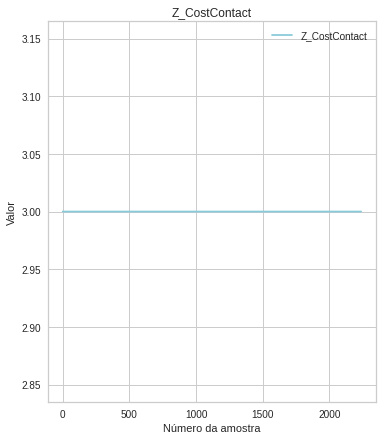

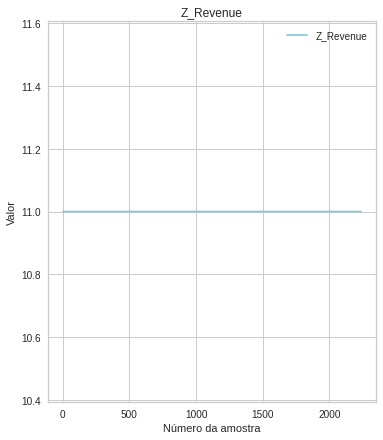

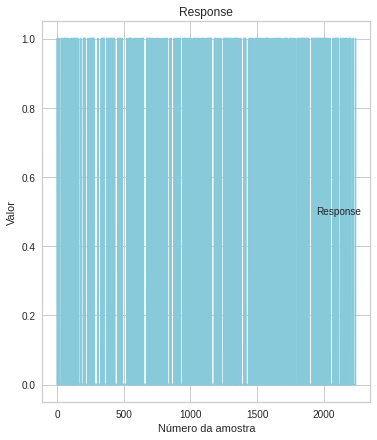

In [ ]:
for i in range (29):
  fig = plt.figure(figsize=(20,7))
  plt.subplot(1,3,2)
  plt.plot(df.iloc[:, i], 'c', label=df.columns[i])
  plt.title(df.columns[i])
  plt.xlabel('Número da amostra')
  plt.ylabel('Valor')
  plt.legend()
  plt.show()

<Figure size 720x288 with 0 Axes>

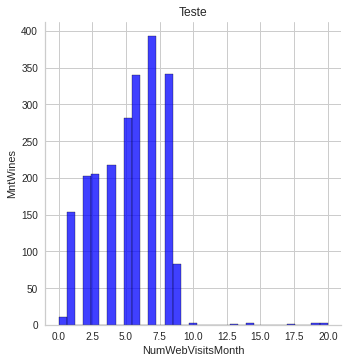

In [ ]:
fig = plt.figure(figsize=(10,4))
sns.displot(df['NumWebVisitsMonth'], color ='blue')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('MntWines')
plt.title('Teste')
plt.show()

In [ ]:
#Carregando o Dataset
marketing = pd.read_table('/content/marketing_campaign.csv', sep = "\t")
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Removendo valores não numéricos
marketing = marketing.dropna()
marketing.shape

(2216, 29)

In [ ]:
#Definindo Features
features = marketing.columns

#Criando a variável Y para ser designada a feature a ser excluida
Y = marketing['Response']

#Selecionando Features
features = features[0:marketing.shape[1]-1]
print(features)
X= marketing[features]
X.head()



Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue'],
      dtype='object')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,3,11
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,3,11


In [ ]:
#Transformar Education em int

le = preprocessing.LabelEncoder()
X['Education'] = le.fit_transform(X['Education'])
le.inverse_transform(X['Education'])
X['Education'].head()

X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,5524,1957,2,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,3,11
1,2174,1954,2,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,3,11
2,4141,1965,2,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,3,11
3,6182,1984,2,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,3,11
4,5324,1981,4,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,3,11


In [ ]:
#Transformar Marital_Status em int

le = preprocessing.LabelEncoder()
X['Marital_Status'] = le.fit_transform(X['Marital_Status'])
le.inverse_transform(X['Marital_Status'])
X['Marital_Status'].head()

X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,3,11
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,3,11
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,3,11
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,3,11
4,5324,1981,4,3,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,3,11


In [ ]:
#Retirar da tabela a coluna Dt_Customer devido a ser uma Data

X = X.drop("Dt_Customer",axis=1)

In [ ]:
#Demonstrando as 5 primeiras linhas com dados do banco
X.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,4,7,0,0,0,0,0,0,3,11
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,2,5,0,0,0,0,0,0,3,11
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,10,4,0,0,0,0,0,0,3,11
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,4,6,0,0,0,0,0,0,3,11
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,6,5,0,0,0,0,0,0,3,11


In [ ]:
#Definindo grupos X e Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
#Demonstrando valores dos grupos X e Y
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1484, 27)
(732, 27)
(1484,)
(732,)


In [ ]:
#Definindo a árvore de decisão e começando o treino dos valores X e Y
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#Treinamento, onde Y depende dos valores X para serem treinados

# Com base no X de treino ele vai dar uma resposta Y_treino
Y_treino = clf.predict(X_train)

# Com base no X de teste ele vai dar uma resposta Y_teste
Y_teste = clf.predict(X_test)

#Comparar a acurácia entre o y_train real com relação ao Y_treino previsto pela rede
acc_treino = accuracy_score(Y_treino, y_train)
print(acc_treino)

#Comparar a acurácia entre o y_test real com relação ao Y_teste previsto pela rede
acc_teste = accuracy_score(Y_teste, y_test)
print(acc_teste)

1.0
0.8278688524590164


In [ ]:
#Definição do SVM
clf = svm.SVC(decision_function_shape='ovr')

# Treinamento OK
clf.fit(X_train, y_train)

SVC()

In [ ]:
X_train.shape

(1484, 27)

In [ ]:
#Treinamento, onde Y depende dos valores X para serem treinados

# Com base no X de treino ele vai dar uma resposta Y_treino
Y_treino = clf.predict(X_train)

# Com base no X de teste ele vai dar uma resposta Y_teste
Y_teste = clf.predict(X_test)


#Comparar a acurácia entre o y_train real com relação ao Y_treino previsto pela rede
acc_treino = accuracy_score(Y_treino, y_train)
print(acc_treino)

#Comparar a acurácia entre o y_test real com relação ao Y_teste previsto pela rede
acc_teste = accuracy_score(Y_teste, y_test)
print(acc_teste)

0.8463611859838275
0.8565573770491803


In [ ]:
#Definição do SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=27)

# Treinamento OK
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(max_iter=27)

In [ ]:
#Treinamento, onde Y depende dos valores X para serem treinados

# Com base no X de treino ele vai dar uma resposta Y_treino
Y_treino = clf.predict(X_train)

# Com base no X de teste ele vai dar uma resposta Y_teste
Y_teste = clf.predict(X_test)


#Comparar a acurácia entre o y_train real com relação ao Y_treino previsto pela rede
acc_treino = accuracy_score(Y_treino, y_train)
print(acc_treino)

#Comparar a acurácia entre o y_test real com relação ao Y_teste previsto pela rede
acc_teste = accuracy_score(Y_teste, y_test)
print(acc_teste)

0.7991913746630728
0.8060109289617486


In [ ]:
# Agrupar coisas semelhantes

#Carregando o Dataset
df = pd.read_table('marketing_campaign.csv', sep = "\t")
df.head()

df = df.dropna()

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
#Remoção das colunas DT_customer e ID , devido a serem incompatíveis com o objetivo do treino por ser DATA e Auto_increment

df = df.drop('Dt_Customer', axis = 1)
df = df.drop('ID', axis = 1)

In [ ]:
#Transformação do valor Education String para Int

le = preprocessing.LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
le.inverse_transform(df['Education'])
df['Education'].head()

0    2
1    2
2    2
3    2
4    4
Name: Education, dtype: int64

In [ ]:
#Transformação do valor Marital Status String para Int

le = preprocessing.LabelEncoder()
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
le.inverse_transform(df['Marital_Status'])
df['Marital_Status'].head()

0    4
1    4
2    5
3    5
4    3
Name: Marital_Status, dtype: int64

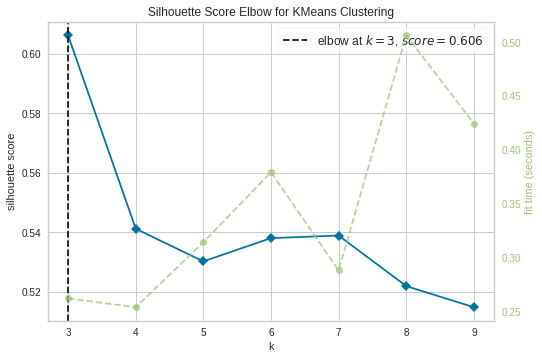

In [ ]:
#Setando o modelo para KMeans (algoritmo)
model = KMeans()

# Silhouette Score for K means
visualizer = KElbowVisualizer(model, k=(3,10), metric='silhouette', timings= True)
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
X_train, X_test, _, _ = train_test_split(df, Y, test_size=0.33, random_state=42)

In [ ]:
#Usar o número de clusters sugerido anteriormento no método da silhouette
kmeans = KMeans(n_clusters = 3)
#Treina e preve logo em seguida na mesma função
label = kmeans.fit_predict(X_train)

# Armazena o centro de cada cluster
centroids = kmeans.cluster_centers_

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(3)
#Transform the data
X_train = pca.fit_transform(X_train)

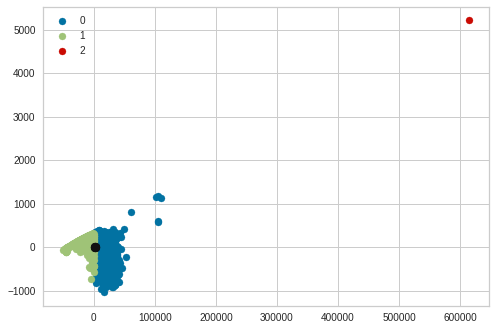

In [ ]:
import numpy as np

#Getting unique labels
u_labels = np.unique(label)
#plotting the results:
for i in u_labels:
    plt.scatter(X_train[label == i , 0] , X_train[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

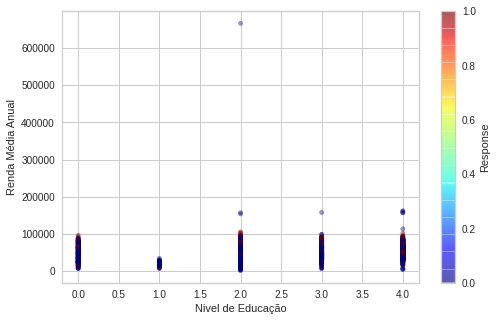

In [ ]:
fig, ax = plt.subplots()

df.plot(kind='scatter', x='Education', y='Income', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.ylabel('Renda Média Anual')
plt.xlabel('Nivel de Educação')
plt.show()

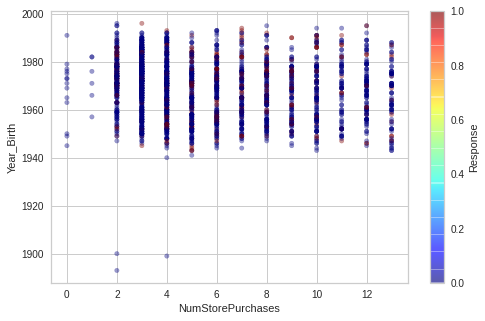

In [ ]:
fig, ax = plt.subplots()

df.plot(kind='scatter', x='NumStorePurchases', y='Year_Birth', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()

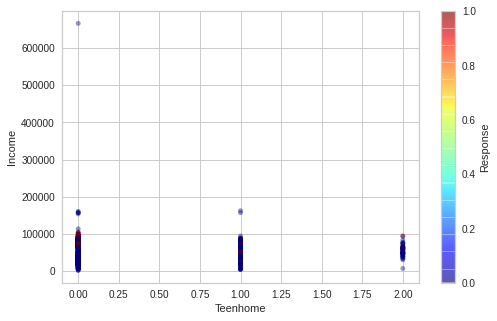

In [ ]:
fig, ax = plt.subplots()

df.plot(kind='scatter', x='Teenhome', y='Income', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True , ax=ax)
plt.legend()
plt.show()

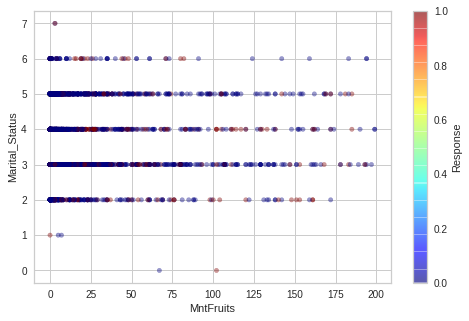

In [ ]:
#Análise de dados de compra de frutas dependendo do estado de relacionamento dos clientes
fig, ax = plt.subplots()

df.plot(kind='scatter', x='MntFruits', y='Marital_Status', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()

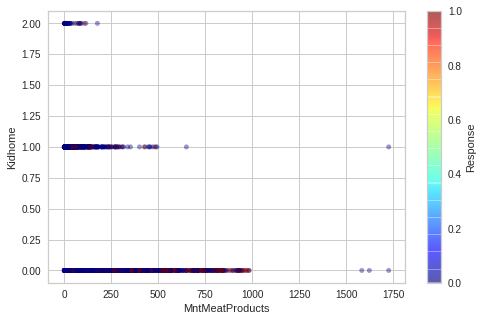

In [ ]:
#Análise de dados de compra de carne por clientes com criança em casa
fig, ax = plt.subplots()

df.plot(kind='scatter', x='MntMeatProducts', y='Kidhome', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()

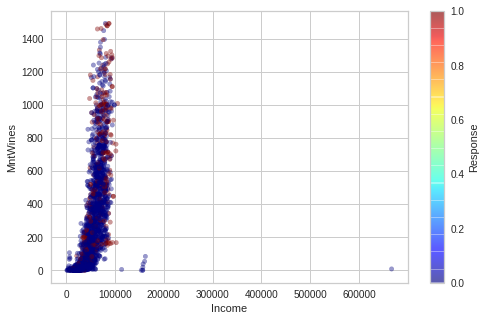

In [ ]:
#Análise de dados de compra de vinho dependendo do salário do cliente
fig, ax = plt.subplots()

df.plot(kind='scatter', x='Income', y='MntWines', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()

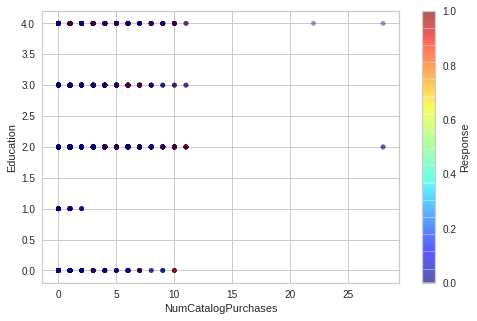

In [ ]:
#Análise de dados de compra da loja do catálogo dependendo da educação do cliente
fig, ax = plt.subplots()

df.plot(kind='scatter', x='NumCatalogPurchases', y='Education', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()

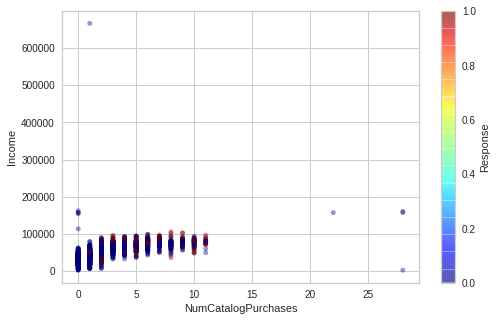

In [ ]:
#Análise de dados de compra na loja dependendo do salário do cliente
fig, ax = plt.subplots()

df.plot(kind='scatter', x='NumCatalogPurchases', y='Income', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()

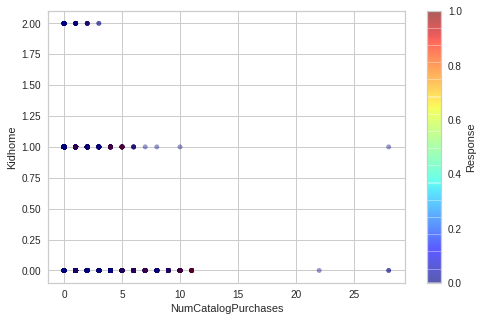

In [ ]:
#Análise de dados de compra na loja de acordo com a qtd de filhos na faixa de idade crianças do cliente
fig, ax = plt.subplots()

df.plot(kind='scatter', x='NumCatalogPurchases', y='Kidhome', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()

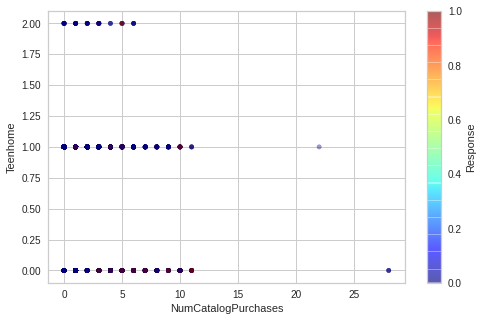

In [ ]:
#Análise de dados de compra na loja dependendo de filhos na faixa de idade adolescentes do cliente
fig, ax = plt.subplots()

df.plot(kind='scatter', x='NumCatalogPurchases', y='Teenhome', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()

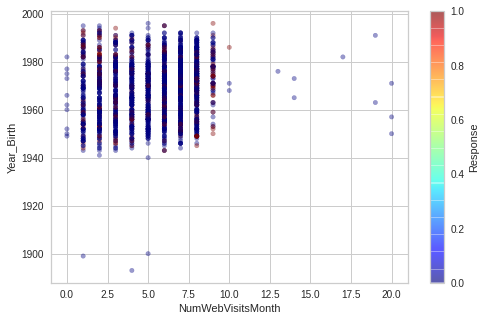

In [ ]:
#Análise de número de visitas por mês por ano de nascimento do cliente
fig, ax = plt.subplots()

df.plot(kind='scatter', x='NumWebVisitsMonth', y='Year_Birth', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True , ax=ax)
plt.legend()
plt.show()

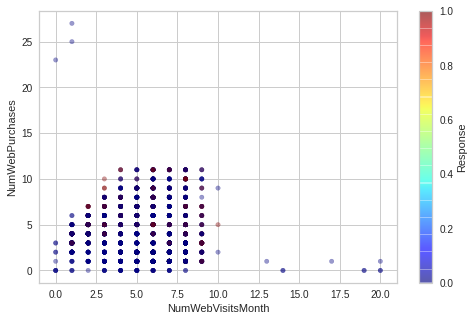

In [ ]:
#Análise de número de visitas por mês no site pelo número de compras no site
fig, ax = plt.subplots()

df.plot(kind='scatter', x='NumWebVisitsMonth', y='NumWebPurchases', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()

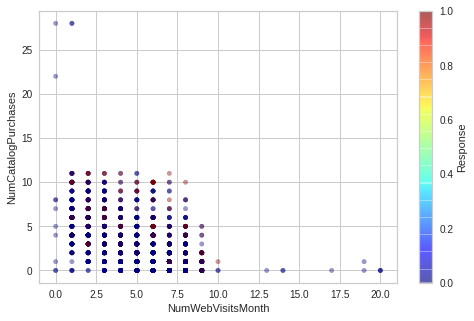

In [ ]:
#Análise de número de visitas por mês no site pelo número de compras no catálogo
fig, ax = plt.subplots()

df.plot(kind='scatter', x='NumWebVisitsMonth', y='NumCatalogPurchases', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()

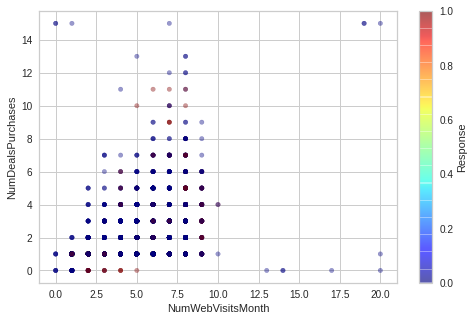

In [ ]:
#Análise de número de visitas por mês no site pelo número de compras de ofertas
fig, ax = plt.subplots()

df.plot(kind='scatter', x='NumWebVisitsMonth', y='NumDealsPurchases', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True , ax=ax)
plt.legend()
plt.show()

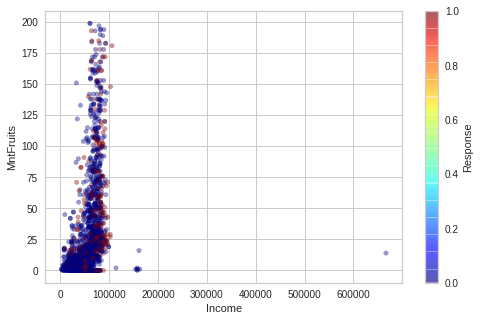

In [ ]:
#Análise de dados de compra de frutas dependendo do salário do cliente
fig, ax = plt.subplots()

df.plot(kind='scatter', x='Income', y='MntFruits', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()

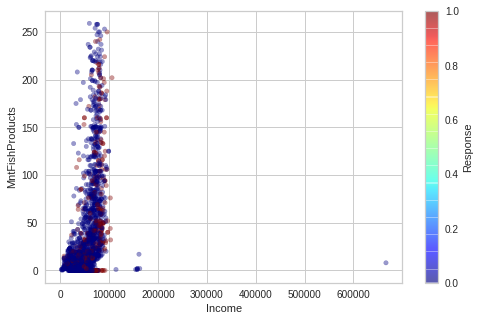

In [ ]:
#Análise de dados de compra de peixe dependendo do salário do cliente
fig, ax = plt.subplots()

df.plot(kind='scatter', x='Income', y='MntFishProducts', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()

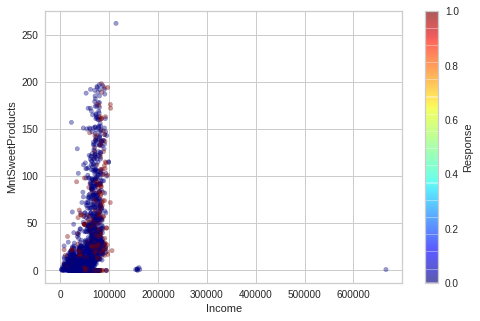

In [ ]:
#Análise de dados de compra de doces dependendo do salário do cliente
fig, ax = plt.subplots()

df.plot(kind='scatter', x='Income', y='MntSweetProducts', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()

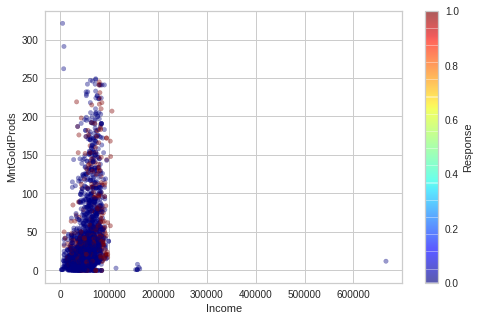

In [ ]:
#Análise de dados de compra de produtos de Ouro dependendo do salário do cliente
fig, ax = plt.subplots()

df.plot(kind='scatter', x='Income', y='MntGoldProds', alpha=0.4,
       figsize=(8, 5), c='Response', cmap=plt.get_cmap('jet'), colorbar=True, ax=ax)
plt.legend()
plt.show()